<a href="https://colab.research.google.com/github/folga67/data_mining/blob/master/OFedorova_hw_les4x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv')
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [ ]:
df.rename(columns={'conversion': 'target', 'offer': 'treatment'}, inplace=True)
df.head(3)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0


In [ ]:
df['treatment'].unique().tolist()

['Buy One Get One', 'No Offer', 'Discount']

In [ ]:
df = df.replace({'Buy One Get One': 1, 'Discount': 1, 'No Offer':0})
df.head(3), df.shape

(   recency  history  used_discount  ...  channel treatment  target
 0       10   142.44              1  ...    Phone         1       0
 1        6   329.08              1  ...      Web         0       0
 2        7   180.65              0  ...      Web         1       0
 
 [3 rows x 9 columns], (64000, 9))

In [ ]:
train.groupby(['target']).describe()

recency                                ... treatment                    
          count      mean       std  min  25%  ...       min  25%  50%  75%  max
target                                         ...                              
0       38227.0  5.870092  3.496210  1.0  3.0  ...       0.0  0.0  1.0  1.0  1.0
1        6573.0  5.120949  3.480946  1.0  2.0  ...       0.0  1.0  1.0  1.0  1.0

[2 rows x 48 columns]

сделать feature engineering на ваше усмотрение (допускается свобода выбора методов)

In [ ]:
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]
        
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [ ]:
df['channel'].unique().tolist(), df['zip_code'].unique().tolist(), df['is_referral'].unique().tolist()


(['Phone', 'Web', 'Multichannel'], ['Surburban', 'Rural', 'Urban'], [0, 1])

In [ ]:
df = df.replace({'Phone': 1, 'Web': 2, 'Multichannel':3})
df = df.replace({'Surburban':1, 'Rural':2, 'Urban':3})

In [ ]:
df.head(3)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,1,0,1,1,0
1,6,329.08,1,1,2,1,2,0,0
2,7,180.65,0,1,1,1,2,1,0


In [ ]:
df.rename(columns={'channel': 'channel', 'target': 'target'}, inplace=True)
print(result)

       recency  history  used_discount  ...  channel  treatment  target
0           10   142.44              1  ...        1          1       0
1            6   329.08              1  ...        2          0       0
2            7   180.65              0  ...        2          1       0
3            9   675.83              1  ...        2          1       0
4            2    45.34              1  ...        2          1       0
...        ...      ...            ...  ...      ...        ...     ...
63995       10   105.54              1  ...        2          1       0
63996        5    38.91              0  ...        1          1       0
63997        6    29.99              1  ...        1          1       0
63998        1   552.94              1  ...        3          1       0
63999        1   472.82              0  ...        2          1       0

[64000 rows x 9 columns]


In [ ]:
continuos_cols = ['history']
cat_cols = ['zip_code', 'channel']
base_cols = ['recency', 'used_discount', 'used_bogo', 'is_referral', 'treatment', 'target']

In [ ]:
continuos_transformers = []
cat_transformers = []
base_transformers = []

for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
                ])
    cat_transformers.append((cat_col, cat_transformer))

for cont_col in continuos_cols:
    transformer = Pipeline([
                ('selector', ColumnSelector(key=cont_col)),
                ('standard', StandardScaler())
                ])
    continuos_transformers.append((cat_col, transformer))

for base_col in base_cols:
    base_transformer = Pipeline([
                ('selector', NumberSelector(key=base_col))
            ])
    base_transformers.append((base_col, base_transformer))

In [ ]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion(continuos_transformers+cat_transformers+base_transformers)
feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

ValueError: ignored

провести uplift-моделирование 3 способами: одна модель с признаком коммуникации (S learner)


In [ ]:
!pip install scikit-uplift==0.2.0

In [ ]:
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel

In [ ]:
!pip3 install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df_features = df.drop(['treatment', 'target'], axis=1)
df_features

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel
0,10,142.44,1,0,1,0,1
1,6,329.08,1,1,2,1,2
2,7,180.65,0,1,1,1,2
3,9,675.83,1,0,2,1,2
4,2,45.34,1,0,3,0,2
...,...,...,...,...,...,...,...
63995,10,105.54,1,0,3,0,2
63996,5,38.91,0,1,3,1,1
63997,6,29.99,1,0,3,1,1
63998,1,552.94,1,0,1,1,3


сделать разбиение набора данных не тренировочную и тестовую выборки

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=123)
df_train.shape, df_test.shape

((44800, 9), (19200, 9))

In [ ]:
indices_train = df_train.index
indices_test = df_test.index
indices_learn, indices_valid = train_test_split(df_train.index, test_size=0.3, random_state=123)

In [ ]:
X_train = df_features.loc[indices_learn, :]
y_train = df_train.loc[indices_learn, 'target']
treat_train = df_train.loc[indices_learn, 'treatment']

X_val = df_features.loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment']

X_train_full = df_features.loc[indices_train, :]
y_train_full = df_train.loc[:, 'target']
treat_train_full = df_train.loc[:, 'treatment']

X_test = df_features.loc[indices_test, :]

##cat_features = ['zip_code']

models_results = {
    'approach': [],
    'uplift@10%': [],
    'uplift@20%': []
}

In [ ]:
1.1 Одна модель с признаком коммуникации

uplift@10%: 0.0889
uplift@20%: 0.1004


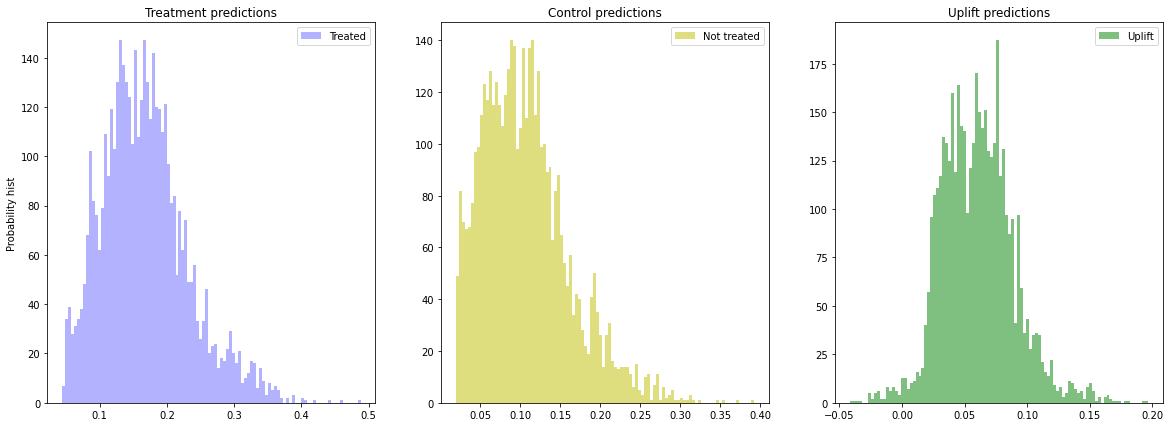

In [ ]:
sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train)

uplift_sm = sm.predict(X_val)

sm_score_10 = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.1)
print(f'uplift@10%: {sm_score_10:.4f}')

sm_score_20 = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.2)
print(f'uplift@20%: {sm_score_20:.4f}')

models_results['approach'].append('SoloModel')
models_results['uplift@10%'].append(sm_score_10)
models_results['uplift@20%'].append(sm_score_20)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

In [ ]:
models_results


{'approach': ['SoloModel'],
 'uplift@10%': [0.08894513242339327],
 'uplift@20%': [0.10037562604340566]}

Посмотрим на топ-признаки

In [ ]:
# С той же легкостью можно обратиться к обученной модели.
# Например, чтобы построить важность признаков:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,treatment,15.961264
1,is_referral,15.086833
2,recency,14.661532
3,zip_code,13.756311
4,history,12.064192
5,used_bogo,10.572284
6,channel,10.181627
7,used_discount,7.715957


модель с трансформацией таргета (трансформация классов п. 2. 1)

In [ ]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_val)

ct_score_10 = uplift_at_k(y_true=y_val, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.1)
ct_score_20 = uplift_at_k(y_true=y_val, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.2)

models_results['approach'].append('ClassTransformation')
models_results['uplift@10%'].append(ct_score_10)
models_results['uplift@20%'].append(ct_score_20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.
  """


In [ ]:
models_results

{'approach': ['SoloModel', 'ClassTransformation'],
 'uplift@10%': [0.08894513242339327, 0.11228871011479707],
 'uplift@20%': [0.10037562604340566, 0.07676645760952941]}

вариант с двумя независимыми моделями

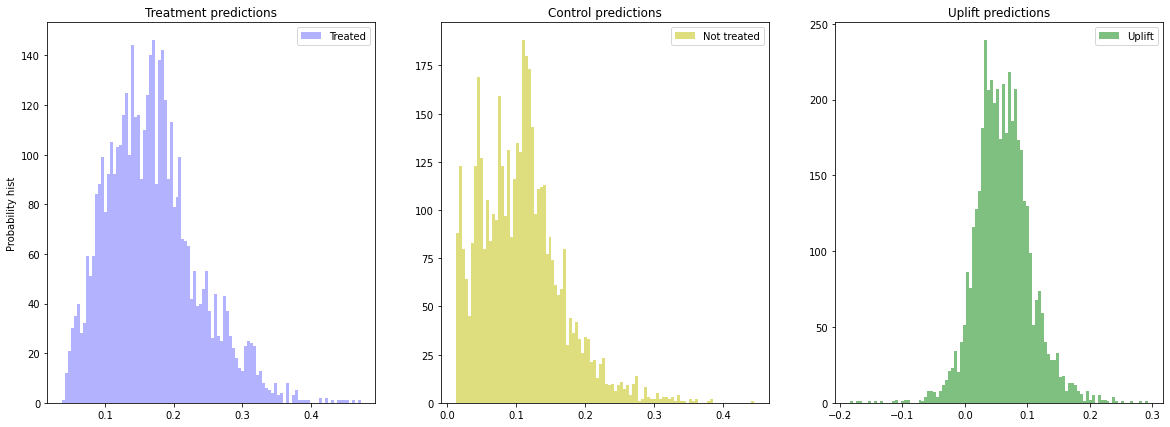

In [ ]:
from sklift.models import TwoModels


tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)
tm = tm.fit(
    X_train, y_train, treat_train)

uplift_tm = tm.predict(X_val)

tm_score_10 = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.1)
tm_score_20 = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.2)

models_results['approach'].append('TwoModels')
models_results['uplift@10%'].append(tm_score_10)
models_results['uplift@20%'].append(tm_score_20)

plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

In [ ]:
models_results

{'approach': ['SoloModel', 'ClassTransformation', 'TwoModels'],
 'uplift@10%': [0.08894513242339327, 0.11228871011479707, 0.13945132423393292],
 'uplift@20%': [0.10037562604340566, 0.07676645760952941, 0.11917384830573478]}

In [ ]:
table_ = pd.DataFrame({'approach': models_results['approach'], 'uplift@10%': models_results['uplift@10%'], 'uplift@20%': models_results['uplift@20%']})
table_

,approach,uplift@10%,uplift@20%
0,SoloModel,0.088945,0.100376
1,ClassTransformation,0.112289,0.076766
2,TwoModels,0.139451,0.119174


In [ ]:
table_1 =pd.DataFrame(data=models_results).sort_values('uplift@10%', ascending=False)
table_1

,approach,uplift@10%,uplift@20%
2,TwoModels,0.139451,0.119174
1,ClassTransformation,0.112289,0.076766
0,SoloModel,0.088945,0.100376


построить модель UpliftTreeClassifier и попытаться описать словами полученное дерево

In [ ]:
X_train_tree = X_train
features = [col for col in X_train]
features

['recency',
 'history',
 'used_discount',
 'used_bogo',
 'zip_code',
 'is_referral',
 'channel']

In [ ]:
!git clone https://github.com/ub8er/causalml.git
%cd causalml
!pip install -r requirements.txt
!python setup.py build_ext --inplace
!python setup.py install

Cloning into 'causalml'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'causalml'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
python3: can't open file 'setup.py': [Errno 2] No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
%%time
from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

uplift_model = UpliftTreeClassifier(max_depth=8, min_samples_leaf=200, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
Image(graph.create_png())

ModuleNotFoundError: ignored